In [1]:
#Install these libraries if you dont have
!pip install xgboost
!pip install graphviz

!pip install pydotplus
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install chart_studio

In [3]:
import numpy as np
import pandas as pd

from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
#Set Seed
np.random.seed(2020)

# Reading the data

In [5]:
gpu_usage =pd.read_csv("sgemm_product.csv")
remove_n = 181000
df = pd.DataFrame(gpu_usage)
drop_indices = np.random.choice(df.index, remove_n, replace=False)
gpu_usage = df.drop(drop_indices)
gpu_usage.shape

(60600, 18)

In [6]:
gpu_usage_1=gpu_usage
gpu_usage_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60600 entries, 6 to 241598
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MWG        60600 non-null  int64  
 1   NWG        60600 non-null  int64  
 2   KWG        60600 non-null  int64  
 3   MDIMC      60600 non-null  int64  
 4   NDIMC      60600 non-null  int64  
 5   MDIMA      60600 non-null  int64  
 6   NDIMB      60600 non-null  int64  
 7   KWI        60600 non-null  int64  
 8   VWM        60600 non-null  int64  
 9   VWN        60600 non-null  int64  
 10  STRM       60600 non-null  int64  
 11  STRN       60600 non-null  int64  
 12  SA         60600 non-null  int64  
 13  SB         60600 non-null  int64  
 14  Run1 (ms)  60600 non-null  float64
 15  Run2 (ms)  60600 non-null  float64
 16  Run3 (ms)  60600 non-null  float64
 17  Run4 (ms)  60600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 8.8 MB


In [7]:
#Calculate the average and setting the average_gpu_usage column
gpu_usage['average_gpu_runtime'] = gpu_usage[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis = 1)
gpu_usage.head(10)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),average_gpu_runtime
6,16,16,16,8,8,8,8,2,1,1,0,1,1,0,83.31,82.86,88.60,82.97,84.4350
9,16,16,16,8,8,8,8,2,1,1,1,0,0,1,85.76,85.30,86.96,87.19,86.3025
13,16,16,16,8,8,8,8,2,1,1,1,1,0,1,91.28,92.42,92.42,93.40,92.3800
20,16,16,16,8,8,8,8,2,1,2,0,1,0,0,76.78,76.71,77.83,77.79,77.2775
21,16,16,16,8,8,8,8,2,1,2,0,1,0,1,65.37,64.81,65.77,65.78,65.4325
27,16,16,16,8,8,8,8,2,1,2,1,0,1,1,76.73,74.15,76.63,74.84,75.5875
31,16,16,16,8,8,8,8,2,1,2,1,1,1,1,75.30,74.06,76.74,77.70,75.9500
38,16,16,16,8,8,8,8,2,2,1,0,1,1,0,63.68,63.10,64.26,67.56,64.6500
42,16,16,16,8,8,8,8,2,2,1,1,0,1,0,62.38,60.36,62.70,69.10,63.6350
44,16,16,16,8,8,8,8,2,2,1,1,1,0,0,74.73,74.77,76.03,79.50,76.2575


In [8]:
gpu_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60600 entries, 6 to 241598
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MWG                  60600 non-null  int64  
 1   NWG                  60600 non-null  int64  
 2   KWG                  60600 non-null  int64  
 3   MDIMC                60600 non-null  int64  
 4   NDIMC                60600 non-null  int64  
 5   MDIMA                60600 non-null  int64  
 6   NDIMB                60600 non-null  int64  
 7   KWI                  60600 non-null  int64  
 8   VWM                  60600 non-null  int64  
 9   VWN                  60600 non-null  int64  
 10  STRM                 60600 non-null  int64  
 11  STRN                 60600 non-null  int64  
 12  SA                   60600 non-null  int64  
 13  SB                   60600 non-null  int64  
 14  Run1 (ms)            60600 non-null  float64
 15  Run2 (ms)            60600 non-null

In [9]:
gpu_usage.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),average_gpu_runtime
count,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000,60600.000000
mean,80.425875,80.678284,25.520000,13.923036,13.988119,17.391815,17.424158,5.000396,2.459241,2.446502,0.498911,0.498251,0.502954,0.499554,216.619880,216.550341,216.484744,216.498575,216.538385
std,42.455838,42.493932,7.854338,7.880116,7.900125,9.387198,9.399608,3.000025,1.954259,1.953479,0.500003,0.500001,0.499995,0.500004,366.320505,365.947998,365.828413,365.928583,366.000845
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.360000,13.380000,13.650000,13.420000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.610000,40.650000,40.620000,40.590000,40.612500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,8.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,69.650000,69.760000,69.585000,69.680000,69.618750
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,226.672500,226.742500,226.797500,226.772500,226.749375
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3256.030000,3271.650000,3283.590000,3279.910000,3257.582500


In [10]:
gpu_usage.shape

(60600, 19)

# training and test split

Text(0.5, 1.0, 'Average gpu runtime distribution')

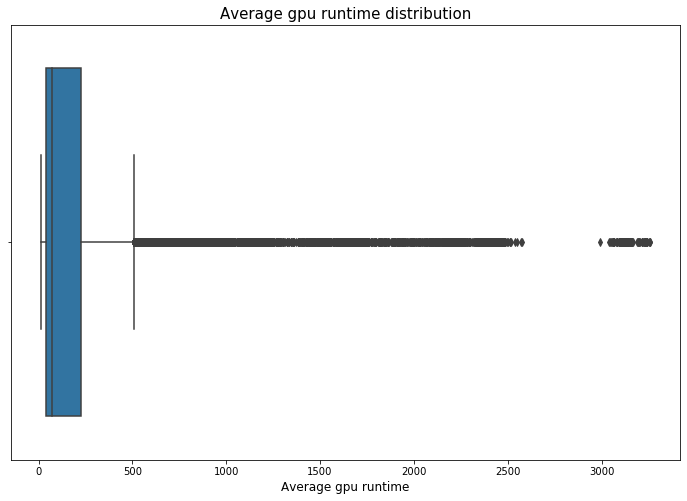

In [11]:
#Visualiztion
# Find outliers
sorted_average_gpu_runtime = gpu_usage.sort_values('average_gpu_runtime',ascending=False)
#print("The number of the 0,1% top values of average gpu usage' load is",
#      len(sorted_average_gpu_runtime.head(len(sorted_average_gpu_runtime)//1000)),"and they have average gpu runtime higher than",
#      sorted_average_gpu_runtime.average_gpu_runtime[19])

# boxplot average_gpu_runtime
plt.figure(figsize=(12,8))
sns.boxplot(x="average_gpu_runtime", data=gpu_usage)
plt.xlabel('Average gpu runtime', fontsize=12)
plt.title("Average gpu runtime distribution", fontsize=15)

In [12]:
# Outliers removal
gpu_usage_a = gpu_usage.drop(gpu_usage[(gpu_usage.average_gpu_runtime>2500)|(gpu_usage.average_gpu_runtime<0)].index)
gpu_usage_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60487 entries, 6 to 241598
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MWG                  60487 non-null  int64  
 1   NWG                  60487 non-null  int64  
 2   KWG                  60487 non-null  int64  
 3   MDIMC                60487 non-null  int64  
 4   NDIMC                60487 non-null  int64  
 5   MDIMA                60487 non-null  int64  
 6   NDIMB                60487 non-null  int64  
 7   KWI                  60487 non-null  int64  
 8   VWM                  60487 non-null  int64  
 9   VWN                  60487 non-null  int64  
 10  STRM                 60487 non-null  int64  
 11  STRN                 60487 non-null  int64  
 12  SA                   60487 non-null  int64  
 13  SB                   60487 non-null  int64  
 14  Run1 (ms)            60487 non-null  float64
 15  Run2 (ms)            60487 non-null

In [13]:
gpu_usage_a = gpu_usage_a.drop("Run1 (ms)", axis= 1)
gpu_usage_a = gpu_usage_a.drop("Run2 (ms)", axis= 1)
gpu_usage_a = gpu_usage_a.drop("Run3 (ms)", axis= 1)
gpu_usage_a = gpu_usage_a.drop("Run4 (ms)", axis= 1)
gpu_usage_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60487 entries, 6 to 241598
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MWG                  60487 non-null  int64  
 1   NWG                  60487 non-null  int64  
 2   KWG                  60487 non-null  int64  
 3   MDIMC                60487 non-null  int64  
 4   NDIMC                60487 non-null  int64  
 5   MDIMA                60487 non-null  int64  
 6   NDIMB                60487 non-null  int64  
 7   KWI                  60487 non-null  int64  
 8   VWM                  60487 non-null  int64  
 9   VWN                  60487 non-null  int64  
 10  STRM                 60487 non-null  int64  
 11  STRN                 60487 non-null  int64  
 12  SA                   60487 non-null  int64  
 13  SB                   60487 non-null  int64  
 14  average_gpu_runtime  60487 non-null  float64
dtypes: float64(1), int64(14)
memory usa

In [14]:
gpu_usage_a['log_average_gpu_runtime'] = np.log(gpu_usage_a.average_gpu_runtime)

In [15]:
# finding correlatin matrix of all the attributes
gpu_usage_a.corr()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,average_gpu_runtime,log_average_gpu_runtime
MWG,1.000000,0.000699,0.006878,0.106021,-0.007320,0.160282,0.013172,-0.008551,0.354453,0.003137,-0.005119,-0.002926,-0.001964,-0.003480,0.360678,0.457656
NWG,0.000699,1.000000,0.008874,-0.001960,0.107703,0.013042,0.158994,-0.005073,-0.006136,0.355350,-0.002437,0.000025,-0.007129,-0.006474,0.319918,0.341122
KWG,0.006878,0.008874,1.000000,0.149484,0.154424,-0.034312,-0.039266,-0.006973,-0.016338,-0.015940,0.001990,0.003264,-0.004700,0.004419,-0.006681,-0.028682
MDIMC,0.106021,-0.001960,0.149484,1.000000,-0.215026,0.195893,0.079626,-0.001224,-0.135971,0.014643,-0.002982,-0.001209,0.004585,0.006826,-0.224736,-0.251496
NDIMC,-0.007320,0.107703,0.154424,-0.215026,1.000000,0.078758,0.193264,-0.001962,0.013267,-0.132051,0.000473,0.001251,0.000373,0.002899,-0.217065,-0.241641
MDIMA,0.160282,0.013042,-0.034312,0.195893,0.078758,1.000000,0.085457,0.004262,-0.204189,-0.019946,-0.001798,-0.003541,-0.000191,0.000085,-0.008178,-0.023883
NDIMB,0.013172,0.158994,-0.039266,0.079626,0.193264,0.085457,1.000000,0.001743,-0.016085,-0.200751,0.001884,0.000206,-0.001852,0.003626,-0.007781,-0.033009
KWI,-0.008551,-0.005073,-0.006973,-0.001224,-0.001962,0.004262,0.001743,1.000000,-0.001857,-0.002772,0.001601,0.009435,0.001345,0.003451,0.020837,-0.015536
VWM,0.354453,-0.006136,-0.016338,-0.135971,0.013267,-0.204189,-0.016085,-0.001857,1.000000,-0.008284,0.003338,0.002770,0.002337,-0.004180,0.168838,0.207622
VWN,0.003137,0.355350,-0.015940,0.014643,-0.132051,-0.019946,-0.200751,-0.002772,-0.008284,1.000000,-0.006082,-0.005660,-0.003896,-0.007846,0.145872,0.145051


# Checking for multi collinearity

In [16]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(gpu_usage, 40))

Top Absolute Correlations
Run2 (ms)  average_gpu_runtime    0.999991
Run4 (ms)  average_gpu_runtime    0.999991
Run3 (ms)  average_gpu_runtime    0.999990
Run2 (ms)  Run4 (ms)              0.999983
Run3 (ms)  Run4 (ms)              0.999982
Run2 (ms)  Run3 (ms)              0.999981
Run1 (ms)  average_gpu_runtime    0.999968
           Run2 (ms)              0.999939
           Run4 (ms)              0.999938
           Run3 (ms)              0.999936
MWG        Run3 (ms)              0.355357
           Run4 (ms)              0.355309
           Run2 (ms)              0.355256
           average_gpu_runtime    0.355203
NWG        VWN                    0.355166
MWG        Run1 (ms)              0.354870
           VWM                    0.354641
NWG        Run3 (ms)              0.316926
           Run4 (ms)              0.316833
           average_gpu_runtime    0.316824
           Run2 (ms)              0.316779
           Run1 (ms)              0.316739
MDIMC      Run1 (ms)        

In [17]:
gpu_usage_a[gpu_usage_a.columns[:]].corr()['log_average_gpu_runtime'][:]

MWG                        0.457656
NWG                        0.341122
KWG                       -0.028682
MDIMC                     -0.251496
NDIMC                     -0.241641
MDIMA                     -0.023883
NDIMB                     -0.033009
KWI                       -0.015536
VWM                        0.207622
VWN                        0.145051
STRM                      -0.058807
STRN                      -0.010538
SA                        -0.095114
SB                        -0.030531
average_gpu_runtime        0.821797
log_average_gpu_runtime    1.000000
Name: log_average_gpu_runtime, dtype: float64

# Column management

In [18]:
feature_b=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN']
feature_1b = gpu_usage_a[feature_b]


In [19]:
gpu_usage_a['average_gpu_runtime_Class'] = np.where(gpu_usage_a['average_gpu_runtime']>=70, 1, 0)
gpu_usage_a['average_gpu_runtime_Class'] = gpu_usage_a['average_gpu_runtime_Class'].astype('category')

In [20]:
target_2 = gpu_usage_a['average_gpu_runtime_Class']
target_2.head()

6     1
9     1
13    1
20    1
21    0
Name: average_gpu_runtime_Class, dtype: category
Categories (2, int64): [0, 1]

In [21]:
avg_gpu_usage_x = ['average_gpu_runtime_Class']
target_x = gpu_usage_a[avg_gpu_usage_x]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feature_1b, target_x, test_size = 0.4, random_state = 0)

# Scaling

In [23]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
  
# To scale data 
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#y_trainS = scaler.fit_transform(y_train)
#y_testS=scaler.transform(y_test)

In [24]:
trainValues = []
testValues = []

# KNN - K nearest neighbours

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.9182464454976303
Test Data 0.8374457532548047

Classification Report

               precision    recall  f1-score   support

           0       0.83      0.86      0.84     12234
           1       0.85      0.82      0.83     11961

    accuracy                           0.84     24195
   macro avg       0.84      0.84      0.84     24195
weighted avg       0.84      0.84      0.84     24195

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


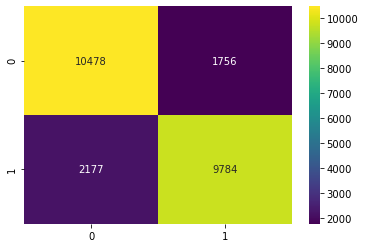

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train) 
predictionsknn3Test = knn.predict(X_test)
predictionsknn3Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn3Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn3Test))
trainValues.append(metrics.accuracy_score(y_train,predictionsknn3Train))
testValues.append(metrics.accuracy_score(y_test,predictionsknn3Test))
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn3Test)) 
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn3Test)),annot=True,fmt="g",cmap='viridis'))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.8960376942576876
Test Data 0.8369084521595371

Classification Report

               precision    recall  f1-score   support

           0       0.82      0.86      0.84     12234
           1       0.85      0.81      0.83     11961

    accuracy                           0.84     24195
   macro avg       0.84      0.84      0.84     24195
weighted avg       0.84      0.84      0.84     24195

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


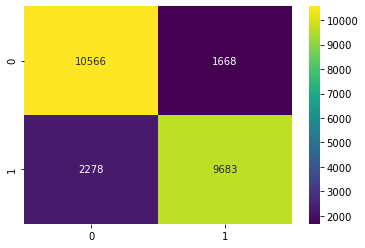

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
predictionsknn5Test = knn.predict(X_test)
predictionsknn5Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn5Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn5Test))
trainValues.append(metrics.accuracy_score(y_train,predictionsknn5Train))
testValues.append(metrics.accuracy_score(y_test,predictionsknn5Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn5Test))  
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn5Test)),annot=True,fmt="g",cmap='viridis'))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.874628017193872
Test Data 0.8335193221740029

Classification Report

               precision    recall  f1-score   support

           0       0.82      0.86      0.84     12234
           1       0.85      0.80      0.83     11961

    accuracy                           0.83     24195
   macro avg       0.83      0.83      0.83     24195
weighted avg       0.83      0.83      0.83     24195

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


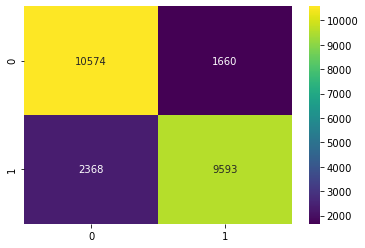

In [27]:
knn = KNeighborsClassifier(n_neighbors=9)  
knn.fit(X_train, y_train)  
predictionsknn9Test = knn.predict(X_test)
predictionsknn9Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn9Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn9Test))
trainValues.append(metrics.accuracy_score(y_train,predictionsknn9Train))
testValues.append(metrics.accuracy_score(y_test,predictionsknn9Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn9Test))  
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn9Test)),annot=True,fmt="g",cmap='viridis'))

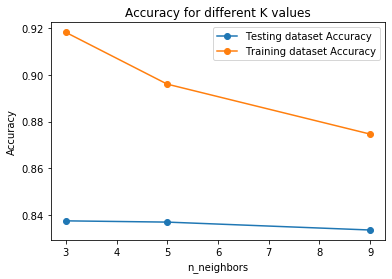

In [28]:
# Generate plot 
plt.plot([3, 5, 9], testValues, 'o-', label = 'Testing dataset Accuracy') 
plt.plot([3, 5, 9], trainValues, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different K values")
plt.show() 

In [29]:
trainValuesDist = []
testValuesDist = []

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.9182464454976303
Test Data 0.8374457532548047

Classification Report

               precision    recall  f1-score   support

           0       0.83      0.86      0.84     12234
           1       0.85      0.82      0.83     11961

    accuracy                           0.84     24195
   macro avg       0.84      0.84      0.84     24195
weighted avg       0.84      0.84      0.84     24195

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


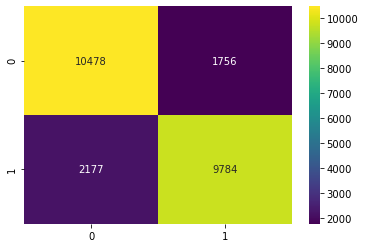

In [30]:
knn = KNeighborsClassifier(n_neighbors=3, metric = "euclidean")  
knn.fit(X_train, y_train)  
predictionsknn9Test = knn.predict(X_test)
predictionsknn9Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn9Train))
trainValuesDist.append(metrics.accuracy_score(y_train,predictionsknn9Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn9Test))
testValuesDist.append(metrics.accuracy_score(y_test,predictionsknn9Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn9Test)) 
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn9Test)),annot=True,fmt="g",cmap='viridis'))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.9232888790918109
Test Data 0.8439346972514983

Classification Report

               precision    recall  f1-score   support

           0       0.84      0.86      0.85     12234
           1       0.85      0.83      0.84     11961

    accuracy                           0.84     24195
   macro avg       0.84      0.84      0.84     24195
weighted avg       0.84      0.84      0.84     24195

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


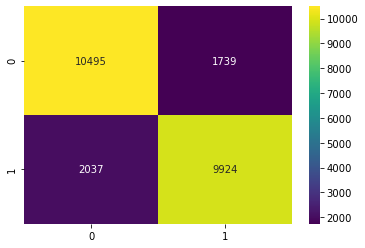

In [31]:
knn = KNeighborsClassifier(n_neighbors=3, metric = "manhattan")  
knn.fit(X_train, y_train)  
predictionsknn9Test = knn.predict(X_test)
predictionsknn9Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn9Train))
trainValuesDist.append(metrics.accuracy_score(y_train,predictionsknn9Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn9Test))
testValuesDist.append(metrics.accuracy_score(y_test,predictionsknn9Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn9Test)) 
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn9Test)),annot=True,fmt="g",cmap='viridis'))

c:\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train Data 0.9249145817260003
Test Data 0.8447613143211408

Classification Report

               precision    recall  f1-score   support

           0       0.85      0.84      0.85     12234
           1       0.84      0.85      0.84     11961

    accuracy                           0.84     24195
   macro avg       0.84      0.84      0.84     24195
weighted avg       0.84      0.84      0.84     24195

Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


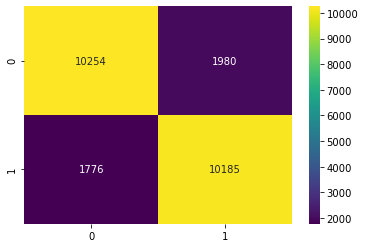

In [32]:
knn = KNeighborsClassifier(n_neighbors=3, metric = "hamming")  
knn.fit(X_train, y_train)  
predictionsknn9Test = knn.predict(X_test)
predictionsknn9Train = knn.predict(X_train)
print('Train Data', metrics.accuracy_score(y_train,predictionsknn9Train))
trainValuesDist.append(metrics.accuracy_score(y_train,predictionsknn9Train))
print('Test Data', metrics.accuracy_score(y_test,predictionsknn9Test))
testValuesDist.append(metrics.accuracy_score(y_test,predictionsknn9Test))  
print('\nClassification Report\n\n', classification_report(y_test,predictionsknn9Test)) 
print('Confusion matrix\n\n', sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictionsknn9Test)),annot=True,fmt="g",cmap='viridis'))

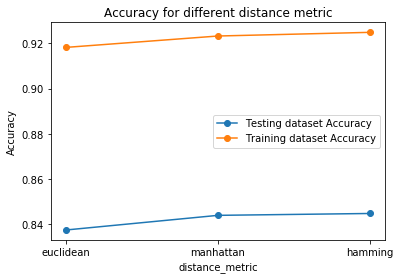

In [33]:
# Generate plot 
plt.plot(['euclidean', 'manhattan', 'hamming'], testValuesDist, 'o-', label = 'Testing dataset Accuracy') 
plt.plot(['euclidean', 'manhattan', 'hamming'], trainValuesDist, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('distance_metric') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different distance metric")
plt.show()

In [34]:
trainValuesLayers = []
testValuesLayers = []

# Artificial Neural network - ANN

Epoch 1/10
36292/36292 [==============================] - 11s 293us/step - loss: 0.3609 - accuracy: 0.8365
Epoch 2/10
36292/36292 [==============================] - 10s 278us/step - loss: 0.2371 - accuracy: 0.8959
Epoch 3/10
36292/36292 [==============================] - 10s 277us/step - loss: 0.2144 - accuracy: 0.9048
Epoch 4/10
36292/36292 [==============================] - 10s 276us/step - loss: 0.2048 - accuracy: 0.9064
Epoch 5/10
36292/36292 [==============================] - 10s 275us/step - loss: 0.1984 - accuracy: 0.9082
Epoch 6/10
36292/36292 [==============================] - 10s 285us/step - loss: 0.1954 - accuracy: 0.9093
Epoch 7/10
36292/36292 [==============================] - 10s 278us/step - loss: 0.1927 - accuracy: 0.9094
Epoch 8/10
36292/36292 [==============================] - 10s 275us/step - loss: 0.1908 - accuracy: 0.9095
Epoch 9/10
36292/36292 [==============================] - 10s 276us/step - loss: 0.1886 - accuracy: 0.9100
Epoch 10/10
36292/36292 [============

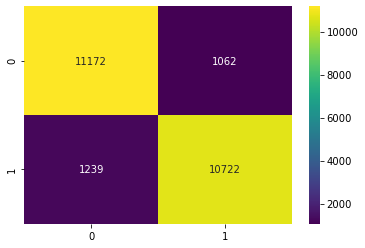

In [36]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesLayers.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesLayers.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
36292/36292 [==============================] - 11s 316us/step - loss: 0.3284 - accuracy: 0.8557
Epoch 2/10
36292/36292 [==============================] - 11s 312us/step - loss: 0.2300 - accuracy: 0.8988
Epoch 3/10
36292/36292 [==============================] - 12s 325us/step - loss: 0.2135 - accuracy: 0.9035
Epoch 4/10
36292/36292 [==============================] - 14s 374us/step - loss: 0.2029 - accuracy: 0.9063
Epoch 5/10
36292/36292 [==============================] - 13s 362us/step - loss: 0.1970 - accuracy: 0.9077
Epoch 6/10
36292/36292 [==============================] - 11s 307us/step - loss: 0.1934 - accuracy: 0.9093
Epoch 7/10
36292/36292 [==============================] - 11s 306us/step - loss: 0.1916 - accuracy: 0.9096
Epoch 8/10
36292/36292 [==============================] - 11s 306us/step - loss: 0.1902 - accuracy: 0.9095
Epoch 9/10
36292/36292 [==============================] - 11s 306us/step - loss: 0.1879 - accuracy: 0.9103
Epoch 10/10
36292/36292 [============

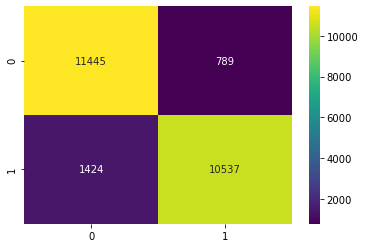

In [37]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesLayers.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesLayers.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
36292/36292 [==============================] - 13s 355us/step - loss: 0.3230 - accuracy: 0.8589
Epoch 2/10
36292/36292 [==============================] - 12s 332us/step - loss: 0.2251 - accuracy: 0.9009
Epoch 3/10
36292/36292 [==============================] - 12s 332us/step - loss: 0.2098 - accuracy: 0.9055
Epoch 4/10
36292/36292 [==============================] - 12s 331us/step - loss: 0.2026 - accuracy: 0.9082
Epoch 5/10
36292/36292 [==============================] - 11s 316us/step - loss: 0.1968 - accuracy: 0.9079
Epoch 6/10
36292/36292 [==============================] - 12s 328us/step - loss: 0.1932 - accuracy: 0.9082
Epoch 7/10
36292/36292 [==============================] - 12s 336us/step - loss: 0.1900 - accuracy: 0.9082
Epoch 8/10
36292/36292 [==============================] - 12s 339us/step - loss: 0.1873 - accuracy: 0.9092
Epoch 9/10
36292/36292 [==============================] - 12s 332us/step - loss: 0.1866 - accuracy: 0.9087
Epoch 10/10
36292/36292 [============

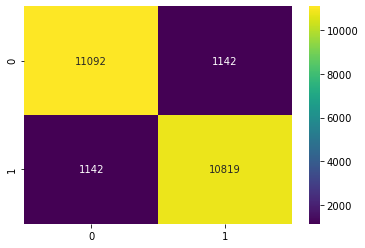

In [38]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesLayers.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesLayers.append(metrics.accuracy_score(y_train,y_predTrain))

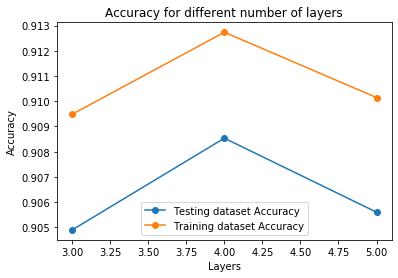

In [39]:
# Generate plot 
plt.plot([3, 4, 5], testValuesLayers, 'o-', label = 'Testing dataset Accuracy') 
plt.plot([3, 4, 5], trainValuesLayers, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('Layers') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different number of layers")
plt.show() 

In [35]:
testValuesActivation = []
trainValuesActivation = []

Epoch 1/10
36292/36292 [==============================] - 11s 309us/step - loss: 0.3468 - accuracy: 0.8413
Epoch 2/10
36292/36292 [==============================] - 11s 310us/step - loss: 0.2467 - accuracy: 0.8895
Epoch 3/10
36292/36292 [==============================] - 11s 303us/step - loss: 0.2204 - accuracy: 0.9021
Epoch 4/10
36292/36292 [==============================] - 11s 309us/step - loss: 0.2078 - accuracy: 0.9043
Epoch 5/10
36292/36292 [==============================] - 11s 298us/step - loss: 0.2018 - accuracy: 0.9069
Epoch 6/10
36292/36292 [==============================] - 13s 352us/step - loss: 0.1977 - accuracy: 0.9080
Epoch 7/10
36292/36292 [==============================] - 11s 298us/step - loss: 0.1952 - accuracy: 0.9082
Epoch 8/10
36292/36292 [==============================] - 11s 293us/step - loss: 0.1927 - accuracy: 0.9085
Epoch 9/10
36292/36292 [==============================] - 11s 299us/step - loss: 0.1912 - accuracy: 0.9084
Epoch 10/10
36292/36292 [============

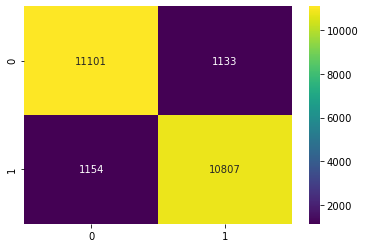

In [36]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesActivation.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesActivation.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
36292/36292 [==============================] - 13s 345us/step - loss: 0.3385 - accuracy: 0.8542
Epoch 2/10
36292/36292 [==============================] - 12s 331us/step - loss: 0.2343 - accuracy: 0.8975
Epoch 3/10
36292/36292 [==============================] - 12s 325us/step - loss: 0.2153 - accuracy: 0.9028
Epoch 4/10
36292/36292 [==============================] - 12s 327us/step - loss: 0.2067 - accuracy: 0.9042
Epoch 5/10
36292/36292 [==============================] - 11s 314us/step - loss: 0.2015 - accuracy: 0.9076
Epoch 6/10
36292/36292 [==============================] - 12s 324us/step - loss: 0.1988 - accuracy: 0.9079
Epoch 7/10
36292/36292 [==============================] - 12s 327us/step - loss: 0.1961 - accuracy: 0.9089
Epoch 8/10
36292/36292 [==============================] - 11s 315us/step - loss: 0.1945 - accuracy: 0.9082
Epoch 9/10
36292/36292 [==============================] - 10s 279us/step - loss: 0.1920 - accuracy: 0.9085
Epoch 10/10
36292/36292 [============

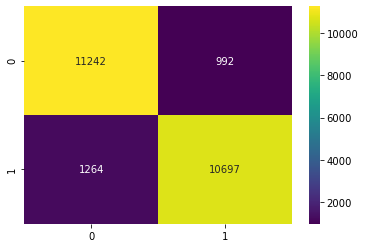

In [37]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesActivation.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesActivation.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
36292/36292 [==============================] - 12s 342us/step - loss: 0.3504 - accuracy: 0.8497
Epoch 2/10
36292/36292 [==============================] - 12s 330us/step - loss: 0.2455 - accuracy: 0.8945
Epoch 3/10
36292/36292 [==============================] - 10s 288us/step - loss: 0.2245 - accuracy: 0.9035
Epoch 4/10
36292/36292 [==============================] - 11s 295us/step - loss: 0.2101 - accuracy: 0.9054
Epoch 5/10
36292/36292 [==============================] - 11s 311us/step - loss: 0.2005 - accuracy: 0.9079
Epoch 6/10
36292/36292 [==============================] - 11s 312us/step - loss: 0.1941 - accuracy: 0.9085
Epoch 7/10
36292/36292 [==============================] - 11s 315us/step - loss: 0.1902 - accuracy: 0.9083
Epoch 8/10
36292/36292 [==============================] - 11s 314us/step - loss: 0.1873 - accuracy: 0.9096
Epoch 9/10
36292/36292 [==============================] - 11s 314us/step - loss: 0.1859 - accuracy: 0.9095
Epoch 10/10
36292/36292 [============

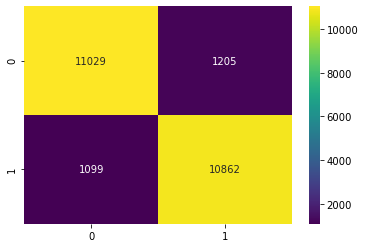

In [38]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=12, activation='tanh'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesActivation.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesActivation.append(metrics.accuracy_score(y_train,y_predTrain))

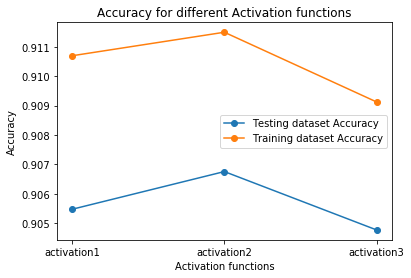

In [39]:
# Generate plot 
plt.plot(['activation1', 'activation2', 'activation3'], testValuesActivation, 'o-', label = 'Testing dataset Accuracy') 
plt.plot(['activation1', 'activation2', 'activation3'], trainValuesActivation, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('Activation functions') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different Activation functions")
plt.show()

Epoch 1/10
36292/36292 [==============================] - 12s 317us/step - loss: 0.3554 - accuracy: 0.8397
Epoch 2/10
36292/36292 [==============================] - 11s 292us/step - loss: 0.2357 - accuracy: 0.8967
Epoch 3/10
36292/36292 [==============================] - 11s 292us/step - loss: 0.2201 - accuracy: 0.9020
Epoch 4/10
36292/36292 [==============================] - 11s 293us/step - loss: 0.2125 - accuracy: 0.9044
Epoch 5/10
36292/36292 [==============================] - 11s 296us/step - loss: 0.2075 - accuracy: 0.9054
Epoch 6/10
36292/36292 [==============================] - 11s 293us/step - loss: 0.2047 - accuracy: 0.9064
Epoch 7/10
36292/36292 [==============================] - 11s 293us/step - loss: 0.2009 - accuracy: 0.9073
Epoch 8/10
36292/36292 [==============================] - 11s 293us/step - loss: 0.1980 - accuracy: 0.9078
Epoch 9/10
36292/36292 [==============================] - 11s 294us/step - loss: 0.1958 - accuracy: 0.9073
Epoch 10/10
36292/36292 [============

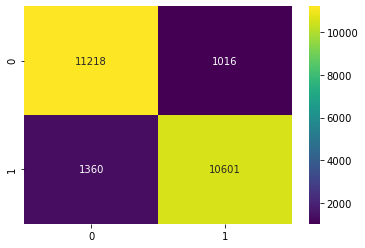

In [40]:
# create model
testValuesNodes = []
trainValuesNodes = []
model = Sequential()
model.add(Dense(10, input_dim=12, activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(7, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesNodes.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesNodes.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
36292/36292 [==============================] - 12s 321us/step - loss: 0.3466 - accuracy: 0.8518
Epoch 2/10
36292/36292 [==============================] - 11s 300us/step - loss: 0.2419 - accuracy: 0.8939
Epoch 3/10
36292/36292 [==============================] - 11s 303us/step - loss: 0.2242 - accuracy: 0.9004
Epoch 4/10
36292/36292 [==============================] - 11s 303us/step - loss: 0.2163 - accuracy: 0.9011
Epoch 5/10
36292/36292 [==============================] - 11s 302us/step - loss: 0.2126 - accuracy: 0.9025
Epoch 6/10
36292/36292 [==============================] - 11s 303us/step - loss: 0.2091 - accuracy: 0.9053
Epoch 7/10
36292/36292 [==============================] - 11s 302us/step - loss: 0.2067 - accuracy: 0.9042
Epoch 8/10
36292/36292 [==============================] - 11s 301us/step - loss: 0.2061 - accuracy: 0.9049
Epoch 9/10
36292/36292 [==============================] - 11s 301us/step - loss: 0.2043 - accuracy: 0.9047
Epoch 10/10
36292/36292 [============

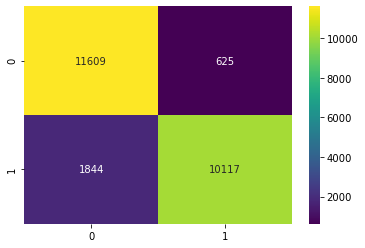

In [41]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=12, activation='relu'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesNodes.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesNodes.append(metrics.accuracy_score(y_train,y_predTrain))

Epoch 1/10
36292/36292 [==============================] - 11s 309us/step - loss: 0.3855 - accuracy: 0.8303
Epoch 2/10
36292/36292 [==============================] - 11s 291us/step - loss: 0.2559 - accuracy: 0.8813
Epoch 3/10
36292/36292 [==============================] - 12s 318us/step - loss: 0.2276 - accuracy: 0.8974
Epoch 4/10
36292/36292 [==============================] - 13s 357us/step - loss: 0.2173 - accuracy: 0.9034
Epoch 5/10
36292/36292 [==============================] - 11s 292us/step - loss: 0.2107 - accuracy: 0.9048
Epoch 6/10
36292/36292 [==============================] - 11s 301us/step - loss: 0.2064 - accuracy: 0.9050
Epoch 7/10
36292/36292 [==============================] - 11s 300us/step - loss: 0.2036 - accuracy: 0.9055
Epoch 8/10
36292/36292 [==============================] - 11s 304us/step - loss: 0.2005 - accuracy: 0.9060
Epoch 9/10
36292/36292 [==============================] - 11s 312us/step - loss: 0.1982 - accuracy: 0.9060
Epoch 10/10
36292/36292 [============

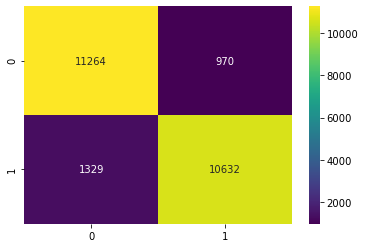

In [42]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=12, activation='relu'))
model.add(Dense(7, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

y_pred = model.predict(X_test)
thresh = 0.5
y_pred = pd.Series(y_pred.flatten())
y_pred = (y_pred > thresh).astype(np.int)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)),annot=True,fmt="g",cmap='viridis')

y_predTrain = model.predict(X_train)
thresh = 0.5
y_predTrain = pd.Series(y_predTrain.flatten())
y_predTrain = (y_predTrain > thresh).astype(np.int)

print('Accuracy->', metrics.accuracy_score(y_test,y_pred))
testValuesNodes.append(metrics.accuracy_score(y_test,y_pred))

print('Accuracy Train->', metrics.accuracy_score(y_train,y_predTrain))
trainValuesNodes.append(metrics.accuracy_score(y_train,y_predTrain))

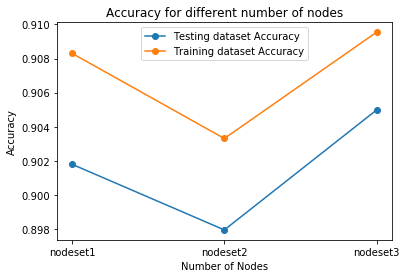

In [43]:
# Generate plot 
plt.plot(['nodeset1', 'nodeset2', 'nodeset3'], testValuesNodes, 'o-', label = 'Testing dataset Accuracy') 
plt.plot(['nodeset1', 'nodeset2', 'nodeset3'], trainValuesNodes, 'o-', label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('Number of Nodes') 
plt.ylabel('Accuracy') 
plt.title("Accuracy for different number of nodes")
plt.show()